In [15]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('SpotifyAudioFeatures2019.csv')

In [34]:
df = df.drop('Unnamed: 0', axis=1)

In [35]:
df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Travis Scott,HIGHEST IN THE ROOM,3eekarcy7kvN4yt5ZFzltW,99,0.598,0.427,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4
1,Post Malone,Circles,21jGcNKet2qwijlDFuPiPb,100,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.5530,120.042,215280,4
2,Juice WRLD,Bandit (with YoungBoy Never Broke Again),6Gg1gjgKi2AK4e0qzsR7sd,94,0.474,0.631,5,-5.884,0,0.3430,0.0687,0.000000,0.1320,0.4250,180.051,189323,4
3,Selena Gomez,Lose You To Love Me,1HfMVBKM75vxSfsQ5VefZ5,98,0.505,0.340,4,-9.005,1,0.0438,0.5760,0.000000,0.2100,0.0916,101.993,206459,4
4,blackbear,hot girl bummer,7aiClxsDWFRQ0Kzk5KI5ku,96,0.778,0.559,6,-7.109,0,0.0776,0.1280,0.000000,0.3990,0.6780,129.989,185093,1


In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

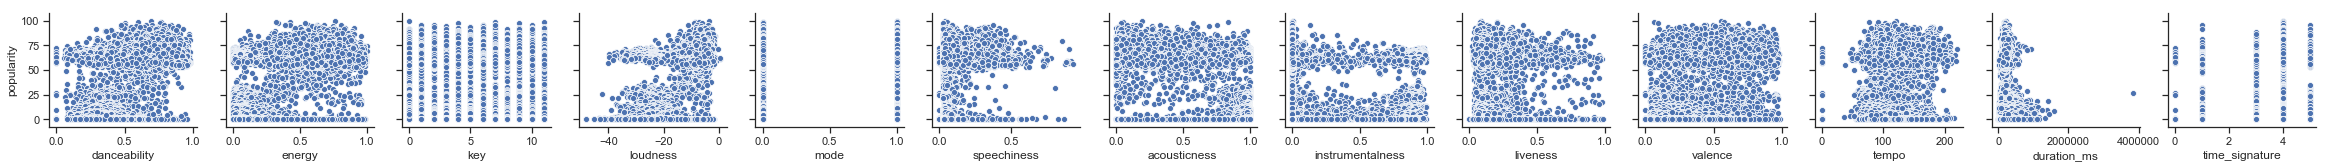

In [19]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop(['popularity', 'artist_name','track_name', 'track_id'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars=['popularity'], x_vars=x_columns)

In [28]:
list(df)

['artist_name',
 'track_name',
 'track_id',
 'popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [37]:
X = df[['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']]
y = df['popularity']

In [38]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     495.2
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        02:53:07   Log-Likelihood:                -41466.
No. Observations:                9245   AIC:                         8.296e+04
Df Residuals:                    9231   BIC:                         8.306e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               82.5080      2.886  

In [ ]:
from xgboost import XGBClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

clf = XGBClassifier()
vec = DictVectorizer()
pipeline = make_pipeline(vec, clf)

def evaluate(_clf):
    scores = cross_val_score(_clf, X, y, scoring='accuracy', cv=10)
    print('Accuracy: {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))
    _clf.fit(train_xs, train_ys)  # so that parts of the original pipeline are fitted

evaluate(pipeline)

In [39]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [41]:
X = df['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']
y = df['popularity']

KeyError: ('danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature')

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.         0.08935355 0.09318527 0.07359929 0.09011849 0.01823747
 0.0867647  0.09539077 0.07744769 0.08744333 0.09021832 0.08536133
 0.08944102 0.02343878]


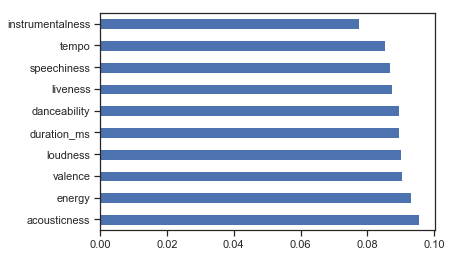

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

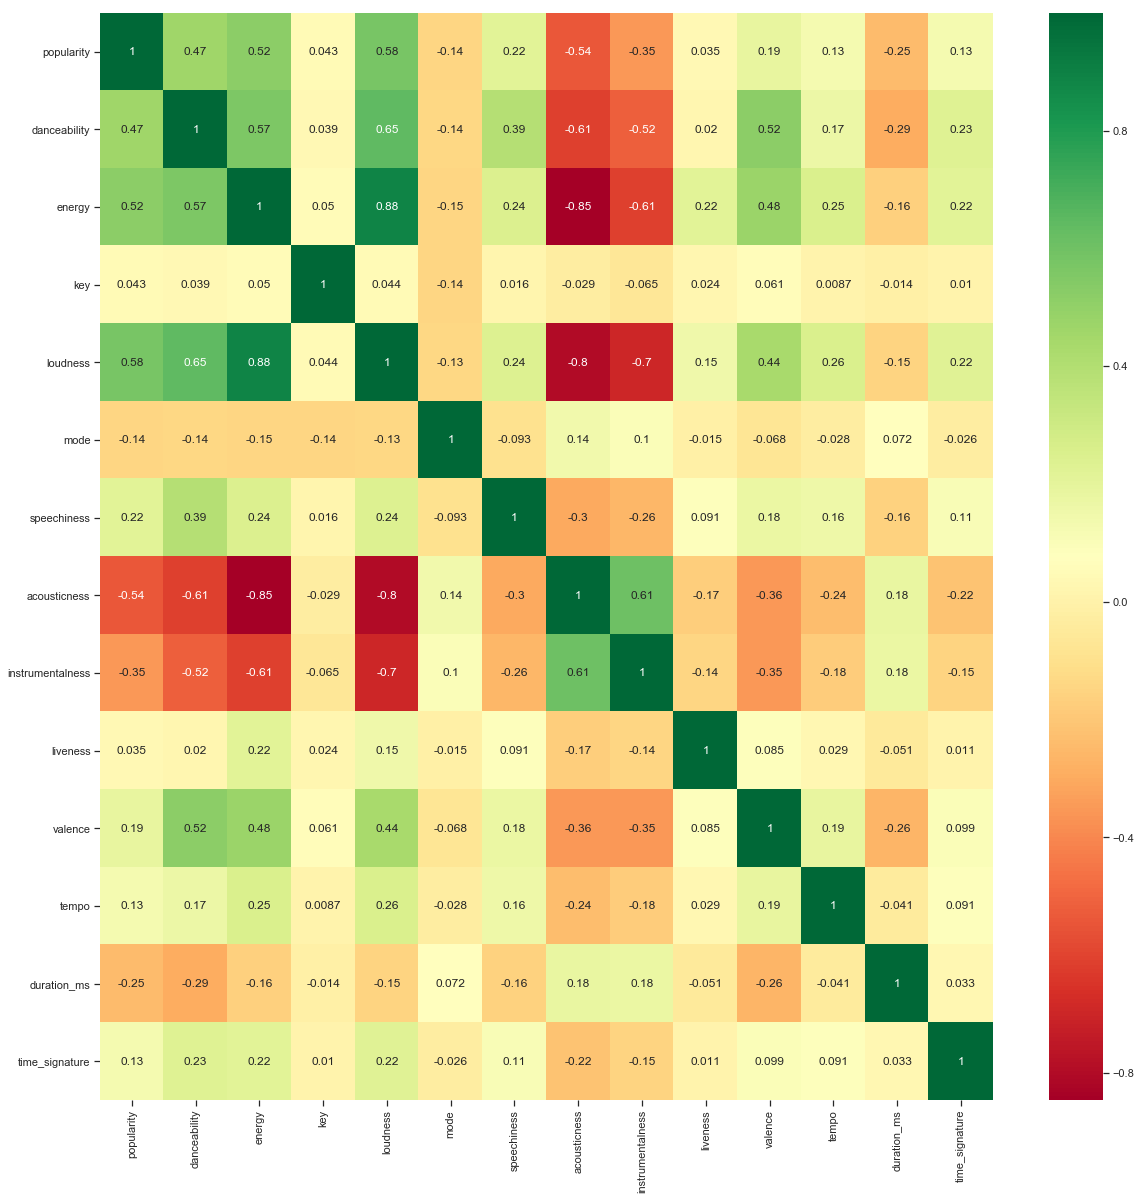

In [47]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [53]:
guess = pd.read_csv('guess.csv')
guess.head()


,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,99,0.598,0.427,7,-8.764,0,0.0317,0.0546,0.000006,0.21,0.0605,76.469,175721,4


In [54]:
Actual_price= 99

a= Actual_price

In [59]:
precdicted_price = model.predict(guess)
b=precdicted_price
b

array([99])

In [56]:
Accuracy_Score = a-b


In [57]:
c= Accuracy_Score

In [58]:
print('The difference between the predicted predicted price and the actual price was:', int(c))

The difference between the predicted predicted price and the actual price was: 0
